# Battleship Proyecto

Este proyecto consiste en simular el juego de hundir la flota con diferentes tamaños de barcos y diferentes estrategias

In [261]:
import numpy as np
import random 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats

#### Definimos una funcion para crear el tablero vacio

El tablero lo definimos como una matriz de ceros y unos, donde los ceros representan las casillas vacias y los unos las casillas donde hay barcos

In [262]:
def board(n):
    """Funcion que crea un tablero vacio (lleno de ceros)"""
    return np.zeros((n,n))


In [263]:
print(board(10))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Definimos una funcion que crea un tablero con un numero de barcos determinado de tamaño uno.

In [264]:
def boardship_size1(n, s):
    """
    Function that create a board nxn with boats of 1 shape in a random position.
    input:
    
    n - size of the board
    s - number of battleships with size one.
    
    output:
    
    board NxN with s boats of size one in a random position.
    
    """
    boardship = board(n)
    positions = [(i,j) for i in range(n) for j in range(n)]
    sample = random.sample(positions, s)
    
    for position in sample:
        boardship[position[0]][position[1]] = 1
    return boardship

In [265]:
print(boardship_size1(10,1))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [266]:
print(boardship_size1(10,10))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Diferente tipos de estrategias para destruir los barcos

Defino una funcion random_attack que buscara los barcos de forma totalmente aleatoria.
Nos devolvera el numero de intentos necesarios hasta conseguir destruir todos los barcos.

In [267]:
def random_attack(boardship):
    """
    Function that attack a board nxn with boats with random attack
    
    input:
    
    Board of nxn size with s ships
    
    output:
    
    number_of_tries - number of tries until destroy all boats with a random method
    
    """
    n = boardship.shape[0]
    
    positions = [(i,j) for i in range(n) for j in range(n)]
    random.shuffle(positions)

    number_of_tries = 0
    while boardship.any():

        if boardship[positions[number_of_tries][0]][positions[number_of_tries][1]] == 1:
            boardship[positions[number_of_tries][0]][positions[number_of_tries][1]] = 0
            number_of_tries += 1
        else:
            number_of_tries += 1

    return number_of_tries


In [268]:
print(random_attack(boardship_size1(10,10)))

97

Aqui defino una funcion Linear_attack que buscara los barcos de forma lineal recorriendo las casillas una por una empezando por la superior izquerda. Nos devolvera el numero de intentos necesarios hasta conseguir destruir todos los barcos

In [269]:
def linear_attack(boardship):
    """
    Function that attack a board nxn with boats with a linear attack, 
    (0, 0) - (0, 1) - (0, 2) - ... - (n, n)
    
    input:
    
    Board of nxn size with s ships
    
    output:
    
    number_of_tries - number of tries until destroy all boats with a linear method
    
    """
    n = boardship.shape[0]
    
    positions = [(i,j) for i in range(n) for j in range(n)]

    number_of_tries = 0
    while boardship.any():

        if boardship[positions[number_of_tries][0]][positions[number_of_tries][1]] == 1:
            boardship[positions[number_of_tries][0]][positions[number_of_tries][1]] = 0
            number_of_tries += 1
        else:
            number_of_tries += 1

    return number_of_tries

In [271]:
print(linear_attack(boardship_size1(10,10)))

95

#### Simulaciones del tablero con 10 barcos de tamaño uno

En primer lugar realizamos las simulaciones, la primera con un ataque aleatorio y la segunda con el ataque lineal 

In [272]:
simulation_sample_1 = np.array([random_attack(boardship_size1(10,10)) for i in range(1000000)])

In [273]:
simulation_sample_2 = np.array([linear_attack(boardship_size1(10,10)) for i in range(1000000)])

In [312]:
print(f'La media de la primera simulacion es {np.mean(simulation_sample_1)}')
print(f'La media de la segunda simulacion es {np.mean(simulation_sample_2)}')
print(f'La mediana de la primera simulacion es {np.median(simulation_sample_1)}')
print(f'La mediana de la segunda simulacion es {np.median(simulation_sample_2)}')
print(f'La desviacion estandar de la primera simulacion es {np.std(simulation_sample_1)}')
print(f'La desviacion estandar de la segunda simulacion es {np.std(simulation_sample_2)}')

La media de la primera simulacion es 91.807874
La media de la segunda simulacion es 91.807546
La mediana de la primera simulacion es 94.0
La mediana de la segunda simulacion es 94.0
La desviacion estandar de la primera simulacion es 7.920339740195746
La desviacion estandar de la segunda simulacion es 7.9138634975518745


Como podemos observar ambos metodos tienen una media y una desviacion estandar muy similar. Cuando las dibujamos podemos observar que son practicamente iguales (si las dibujamos en la misma grafica se superponen)

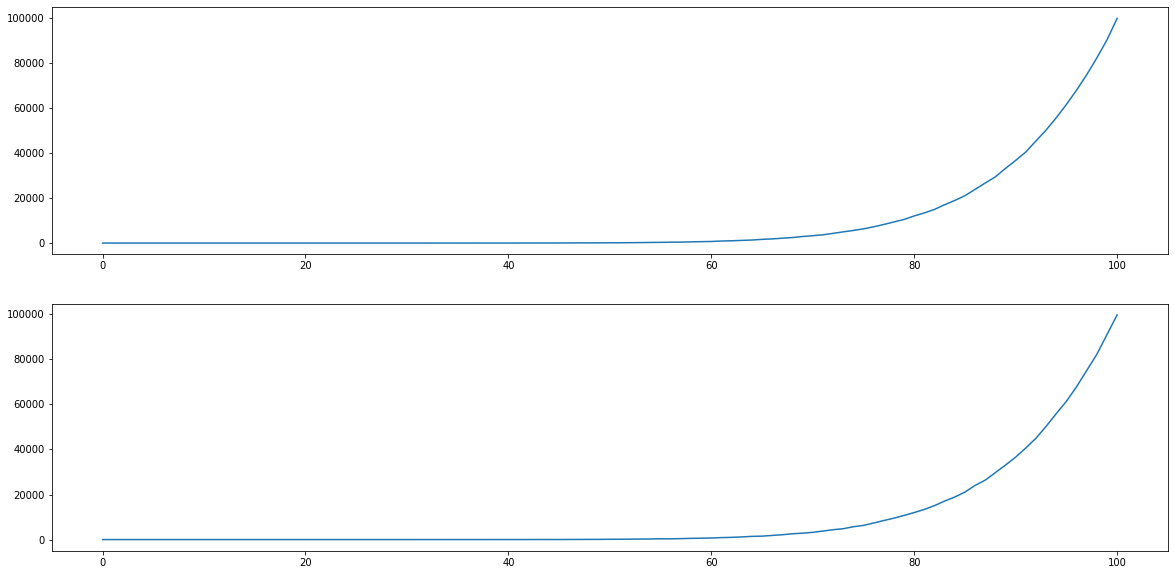

In [281]:
x = np.arange(101)
y_1 = np.bincount(simulation_sample_1) 
y_2 = np.bincount(simulation_sample_2)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x,y_1, '-')
plt.subplot(212)
plt.plot(x,y_2, '-')

Dado que no son distribuciones normales (se parece mas a la exponencial) podemos utilizar spearman para ver la correlacion entre ambas variables

In [304]:
print(stats.spearmanr(y_1,y_2))
print(stats.ttest_rel(y_1,y_2))

"""Spearman nos da un correlacion de practicamente 1"""


SpearmanrResult(correlation=0.9978404465887207, pvalue=6.803325009230608e-119)
Ttest_relResult(statistic=0.0, pvalue=1.0)


'Spearman nos da un correlacion de casi 1'

Por tanto, la conclusion es que con ambas estrategias tenemos los mismos resultados. Aqui muestro su funcion acumulativa de probabilidad


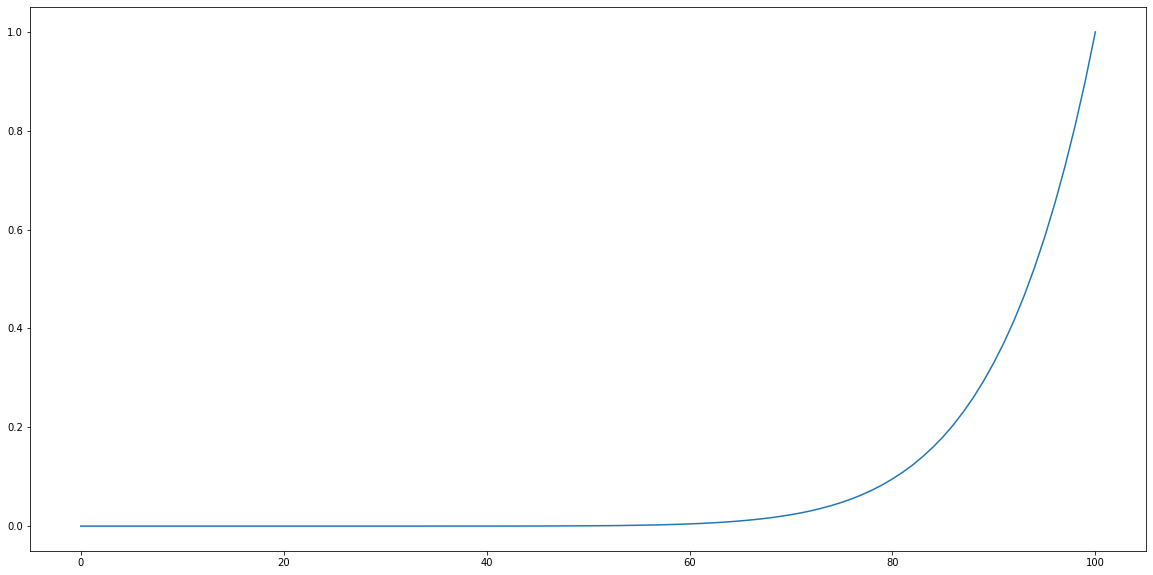

In [327]:
z_1 = np.cumsum(y_1/1000000)
plt.figure(figsize=(20,10))
plt.plot(x,z_1, '-')


#### Simulacion con un tablero y 1 solo barco de tamano 1

Aqui hacemos la simulacion con solo un barco de size uno 

In [296]:
simulation_sample_3 = np.array([random_attack(boardship_size1(10,1)) for i in range(1000000)])

In [297]:
simulation_sample_4 = np.array([linear_attack(boardship_size1(10,1)) for i in range(1000000)])

In [320]:
print(f'La media de la primera simulacion es {np.mean(simulation_sample_3)}')
print(f'La media de la segunda simulacion es {np.mean(simulation_sample_4)}')
print(f'La mediana de la primera simulacion es {np.median(simulation_sample_3)}')
print(f'La mediana de la segunda simulacion es {np.median(simulation_sample_4)}')
print(f'La desviacion estandar de la primera simulacion es {np.std(simulation_sample_3)}')
print(f'La desviacion estandar de la segunda simulacion es {np.std(simulation_sample_4)}')

La media de la primera simulacion es 50.50167
La media de la segunda simulacion es 50.451942
La mediana de la primera simulacion es 50.0
La mediana de la segunda simulacion es 50.0
La desviacion estandar de la primera simulacion es 28.860170360049853
La desviacion estandar de la segunda simulacion es 28.852169769856754


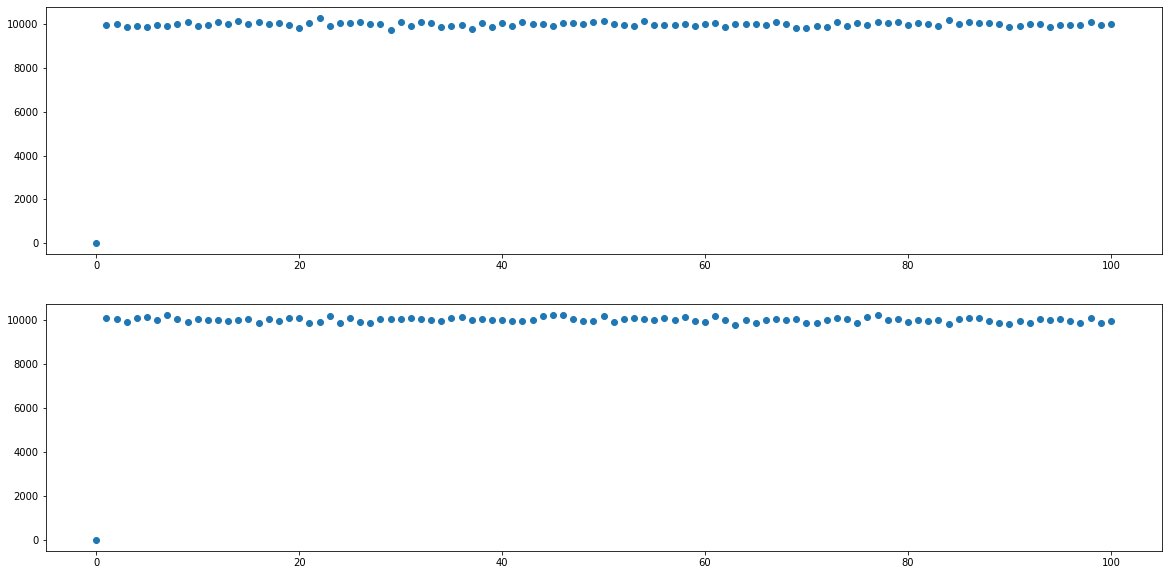

In [303]:
x = np.arange(101)
y_3 = np.bincount(simulation_sample_3) 
y_4 = np.bincount(simulation_sample_4)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x,y_3, 'o')
plt.subplot(212)
plt.plot(x,y_4, 'o')

In [307]:
print(stats.pearsonr(y_3,y_4))
print(stats.ttest_rel(y_3,y_4))

"""Pearson nos da un correlacion de casi 1"""

(0.9906929611250299, 1.4584384406882014e-87)
Ttest_relResult(statistic=0.0, pvalue=1.0)


'Spearman nos da un correlacion de casi 1'

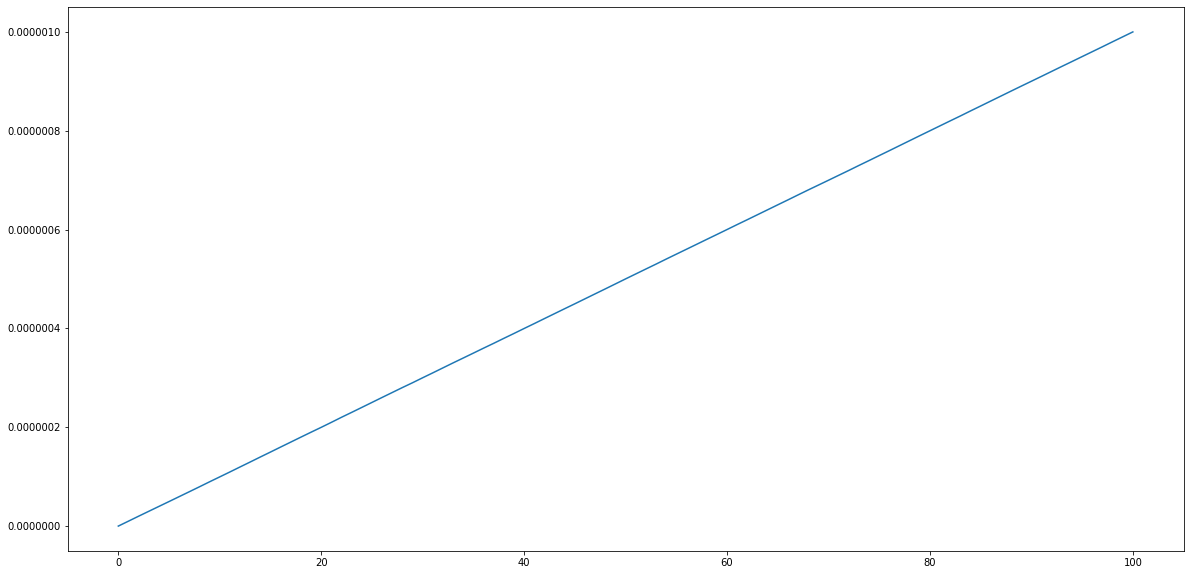

In [328]:
z_3 = np.cumsum(y_3/1000000)
plt.figure(figsize=(20,10))
plt.plot(x,z_3, '-')

#### Defino una funcion que crea un tablero con barcos de un size  dado.

In [329]:
def boardship_size(n, size, s):
    """
    Function that create a board nxn with boats of 2 shape in a random position.
    input:
    
    n - size of the board
    size - size of the ship
    s - number of battleships with size.
    
    output:
    
    board NxN with s boats of size in a random position.
    
    """

    boardship = board(n)
    positions = [(i,j) for i in range(n) for j in range(n)]

    sample = []
    limit_tries = 100
    for i in range(s):
        
        repeat = True
        while repeat and limit_tries > 0:
            add = True
            orientation = random.randint(0,1)

            if orientation:
                max_row = n-1
                max_column = (n-1) - (size-1)
            else:
                max_row = (n-1) - (size-1)
                max_column =  n-1

            row = random.randint(0,max_row)
            column = random.randint(0,max_column)
            
            ship = [(row,column+i) if orientation else (row+i,column) for i in range(size)]

            for point in ship:
                if point in sample:
                    add = False

            if add:
                sample += ship
                repeat= False
            limit_tries -= 1
            
    if limit_tries ==0:
        print('Excedido el numero de intentos, es posible que no se pueda contruir un boardship de este tipo')
    
    for position in sample:
        boardship[position[0]][position[1]] = 1

    return boardship

In [336]:
boardship_size(10, 2, 10) # tablero con 10 barcos de size 2


array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 1.]])

Defino una nueva estrategia para atacar, cuando acierte mirara en las casillas adyacentes

In [532]:
def near_attack(boardship):
    """
    Function that attack a board nxn with boats with a near attack
    
    input:
    
    Board of nxn size with s ships
    
    output:
    
    cont - number of tries until destroy all boats with a near method
    
    """
    n = boardship.shape[0]
    
    positions = [(i,j) for i in range(n) for j in range(n)]
    random.shuffle(positions)

    number_of_tries = 0
    cont = 0
    
    while boardship.any():
        
        if boardship[positions[cont][0]][positions[cont][1]] == 1:
            boardship[positions[cont][0]][positions[cont][1]] = 0
            number_of_tries += 1
            if (positions[cont][0] == 0) and (positions[cont][1] == 0):
                if boardship[positions[cont][0]][positions[cont][1]+1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]+1] = 0
                    number_of_tries += 1
                    cont += 1
                else:
                    boardship[positions[cont][0]+1][positions[cont][1]] = 0
                    number_of_tries += 2
                    cont += 1
            elif (positions[cont][0] == 0) and (positions[cont][1] == 9):
                if boardship[positions[cont][0]][positions[cont][1]-1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]-1] = 0
                    number_of_tries += 1
                    cont += 1
                else:
                    boardship[positions[cont][0]+1][positions[cont][1]] = 0
                    number_of_tries += 2
                    cont += 1
            elif positions[cont][0] == 9 and positions[cont][1] == 0:
                if boardship[positions[cont][0]][positions[cont][1]+1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]+1] = 0
                    number_of_tries += 1
                    cont += 1
                else:
                    boardship[positions[cont][0]-1][positions[cont][1]] = 0
                    number_of_tries += 2
                    cont += 1
            elif positions[cont][0] == 9 and positions[cont][1] == 9:
                if boardship[positions[cont][0]][positions[cont][1]-1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]-1] = 0
                    number_of_tries += 1
                    cont += 1
                else:
                    boardship[positions[cont][0]-1][positions[cont][1]] = 0
                    number_of_tries += 2
                    cont += 1
            elif positions[cont][0] == 0:
                if boardship[positions[cont][0]][positions[cont][1]-1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]-1] = 0
                    number_of_tries += 1
                    cont += 1
                elif boardship[positions[cont][0]][positions[cont][1]+1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]+1] = 0
                    number_of_tries += 2
                    cont += 1
                else:
                    boardship[positions[cont][0]+1][positions[cont][1]] = 0
                    number_of_tries += 3
                    cont += 1
            elif positions[cont][0] == 9:
                if boardship[positions[cont][0]][positions[cont][1]-1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]-1] = 0
                    number_of_tries += 1
                    cont += 1
                elif boardship[positions[cont][0]][positions[cont][1]+1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]+1] = 0
                    number_of_tries += 2
                    cont += 1
                else:
                    boardship[positions[cont][0]-1][positions[cont][1]] = 0
                    number_of_tries += 3
                    cont += 1
            elif positions[cont][1] == 0:
                if boardship[positions[cont][0]+1][positions[cont][1]] == 1:
                    boardship[positions[cont][0]+1][positions[cont][1]] = 0
                    number_of_tries += 1
                    cont += 1
                elif boardship[positions[cont][0]-1][positions[cont][1]] == 1:
                    boardship[positions[cont][0]-1][positions[cont][1]] = 0
                    number_of_tries += 2
                    cont += 1
                else:
                    boardship[positions[cont][0]][positions[cont][1]+1] = 0
                    number_of_tries += 3
                    cont += 1
            elif positions[cont][1] == 9:
                if boardship[positions[cont][0]+1][positions[cont][1]] == 1:
                    boardship[positions[cont][0]+1][positions[cont][1]] = 0
                    number_of_tries += 1
                    cont += 1
                elif boardship[positions[cont][0]-1][positions[cont][1]] == 1:
                    boardship[positions[cont][0]-1][positions[cont][1]] = 0
                    number_of_tries += 2
                    cont += 1
                else:
                    boardship[positions[cont][0]][positions[cont][1]-1] = 0
                    number_of_tries += 3
                    cont += 1
            else:
                if boardship[positions[cont][0]+1][positions[cont][1]] == 1:
                    boardship[positions[cont][0]+1][positions[cont][1]] == 0
                    number_of_tries += 1
                    cont += 1
                elif boardship[positions[cont][0]-1][positions[cont][1]] == 1:
                    boardship[positions[cont][0]-1][positions[cont][1]] == 0
                    number_of_tries += 2
                    cont += 1
                elif boardship[positions[cont][0]][positions[cont][1]-1] == 1:
                    boardship[positions[cont][0]][positions[cont][1]-1] = 0
                    number_of_tries += 3
                    cont += 1
                else:
                    boardship[positions[cont][0]][positions[cont][1]+1] = 0
                    number_of_tries += 4
                    cont += 1
                    
            
        else:
            number_of_tries += 1
            cont += 1
            
            

    return cont

In [595]:
def binary_attack(boardship):
    """
    Function that attack a board nxn with boats with a near attack
    
    input:
    
    Board of nxn size with s ships
    
    output:
    
    cont - number of tries until destroy all boats with a near method
    
    """
    n = boardship.shape[0]
    
    positions = [(i,j) for i in range(n) for j in range(n)]
    
    attack_positions = [(i,j) for i in range(n) for j in range(n) if ((i+j) % 2 == 0)]

    number_of_tries = 0
    cont = 0
    
    while boardship.any():
        if boardship[attack_positions[cont][0]][attack_positions[cont][1]] == 1:
            boardship[attack_positions[cont][0]][attack_positions[cont][1]] = 0
            number_of_tries +=1
            if attack_positions[cont][0] % 2 == 0:
                boardship[attack_positions[cont][0]][attack_positions[cont][1]+1] = 0
                number_of_tries +=1
            else:
                boardship[attack_positions[cont][0]-1][attack_positions[cont][1]] = 0
                number_of_tries +=1       
        cont += 1

    return number_of_tries

#### Aqui realizamos las simulacion con nuestro random_attack y con near_attack

In [521]:
simulation_sample_5 = np.array([random_attack(boardship_size(10, 2, 10)) for i in range(1000000)])

In [569]:
simulation_sample_6 = np.array([near_attack(boardship_size(10, 2, 10)) for i in range(1000000)])

In [571]:
print(f'La media de la primera simulacion es {np.mean(simulation_sample_5)}')
print(f'La media de la segunda simulacion es {np.mean(simulation_sample_6)}')
print(f'La mediana de la primera simulacion es {np.median(simulation_sample_5)}')
print(f'La mediana de la segunda simulacion es {np.median(simulation_sample_6)}')
print(f'La desviacion estandar de la primera simulacion es {np.std(simulation_sample_5)}')
print(f'La desviacion estandar de la segunda simulacion es {np.std(simulation_sample_6)}')


La media de la primera simulacion es 96.190997
La media de la segunda simulacion es 90.017209
La mediana de la primera simulacion es 97.0
La mediana de la segunda simulacion es 92.0
La desviacion estandar de la primera simulacion es 4.082449405196714
La desviacion estandar de la segunda simulacion es 9.06644124507069


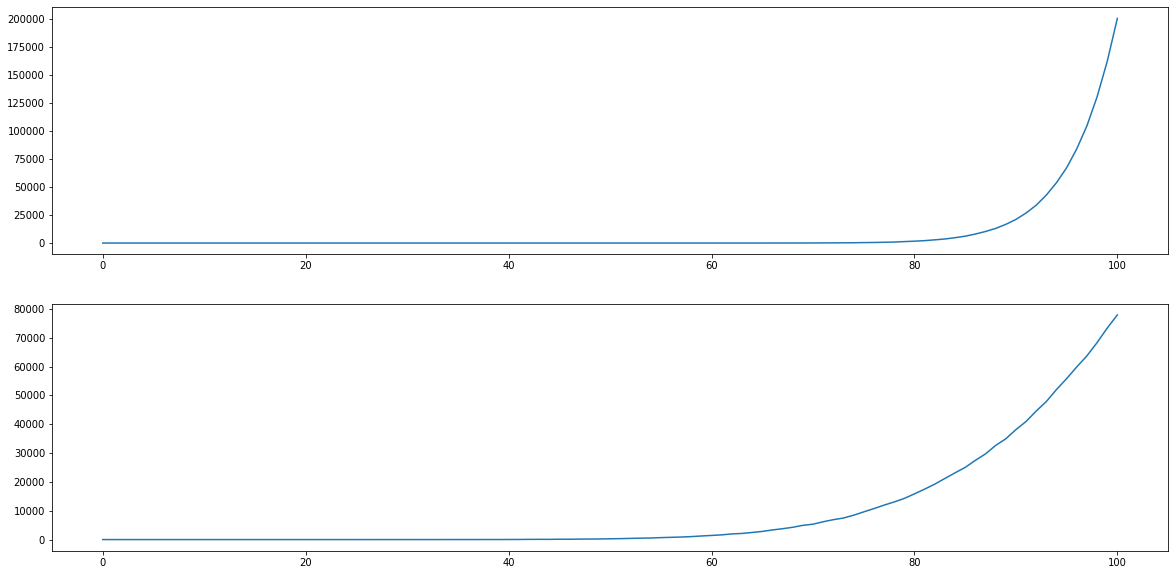

In [737]:
x = np.arange(101)
y_5 = np.bincount(simulation_sample_5) 
y_6 = np.bincount(simulation_sample_6)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x,y_5, '-')
plt.subplot(212)
plt.plot(x,y_6, '-')

In [738]:
stats.spearmanr(y_5,y_6)

SpearmanrResult(correlation=0.9100384647748586, pvalue=1.2035867306468218e-39)

In [740]:
simulation_sample_7 = np.array([random_attack(boardship_size(10, 2, 1)) for i in range(1000000)])

In [741]:
simulation_sample_8 = np.array([near_attack(boardship_size(10, 2, 1)) for i in range(1000000)])

In [742]:
print(f'La media de la primera simulacion es {np.mean(simulation_sample_7)}')
print(f'La media de la segunda simulacion es {np.mean(simulation_sample_8)}')
print(f'La mediana de la primera simulacion es {np.median(simulation_sample_7)}')
print(f'La mediana de la segunda simulacion es {np.median(simulation_sample_8)}')
print(f'La desviacion estandar de la primera simulacion es {np.std(simulation_sample_7)}')
print(f'La desviacion estandar de la segunda simulacion es {np.std(simulation_sample_8)}')

La media de la primera simulacion es 67.359216
La media de la segunda simulacion es 45.646665
La mediana de la primera simulacion es 71.0
La mediana de la segunda simulacion es 43.0
La desviacion estandar de la primera simulacion es 23.428893697000376
La desviacion estandar de la segunda simulacion es 28.453799559597925


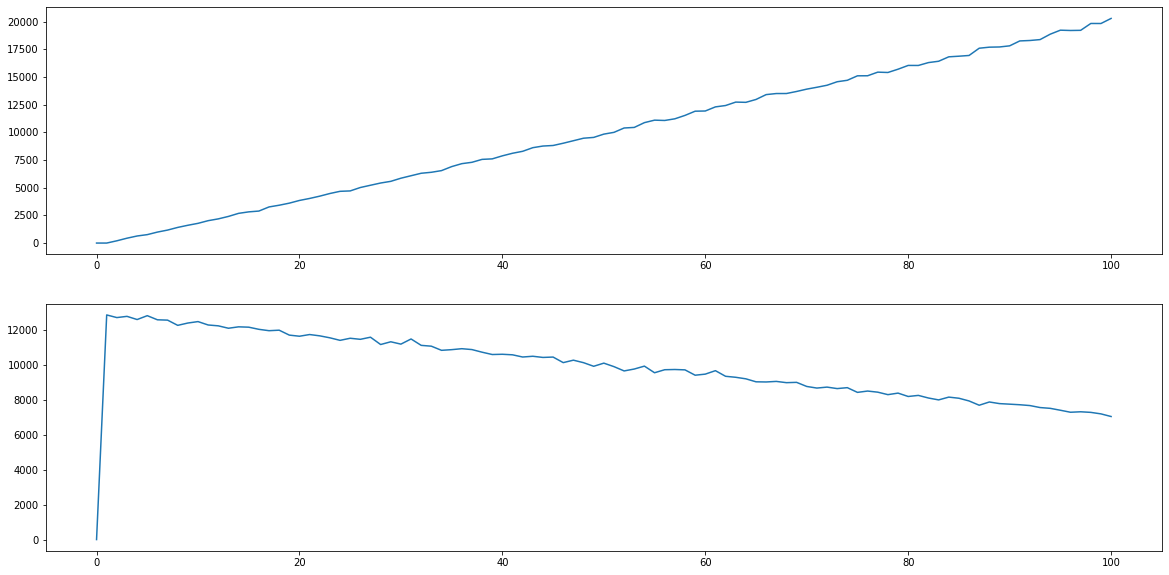

In [743]:
x = np.arange(101)
y_7 = np.bincount(simulation_sample_7) 
y_8 = np.bincount(simulation_sample_8)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x,y_7, '-')
plt.subplot(212)
plt.plot(x,y_8, '-')

In [727]:
def probability_attack():
    boardship = boardship_size(10, 2, 10)
    
    probability_board = boardship_size(10, 2, 10)

    for i in range(10000):
        probability_board += boardship_size(10, 2, 10)

    cont = 0
    while boardship.any():
        if boardship[np.where(probability_board == np.max(probability_board))[0][0]][np.where(probability_board == np.max(probability_board))[1][0]] == 1:
            boardship[np.where(probability_board == np.max(probability_board))[0][0]][np.where(probability_board == np.max(probability_board))[1][0]] = 0 
            probability_board[np.where(probability_board == np.max(probability_board))[0][0]][np.where(probability_board == np.max(probability_board))[1][0]] = 0
            cont+=1
        else:
            probability_board[np.where(probability_board == np.max(probability_board))[0][0]][np.where(probability_board == np.max(probability_board))[1][0]] = 0
            cont+=1
    return cont

In [744]:
simulation_sample_7 = np.array([ probability_attack() for i in range(100)])

In [745]:
np.mean(simulation_sample_7)

94.77